In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv('bank-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# search missing values
for column in df.columns:
    print(f'{column} has {df[column].isnull().sum()} missing values')

age has 0 missing values
job has 0 missing values
marital has 0 missing values
education has 0 missing values
default has 0 missing values
balance has 0 missing values
housing has 0 missing values
loan has 0 missing values
contact has 0 missing values
day has 0 missing values
month has 0 missing values
duration has 0 missing values
campaign has 0 missing values
pdays has 0 missing values
previous has 0 missing values
poutcome has 0 missing values
y has 0 missing values


In [4]:
# check all columns data types

for column in df.columns:
    print(f'{column} has {df[column].dtype} data type')


age has int64 data type
job has object data type
marital has object data type
education has object data type
default has object data type
balance has int64 data type
housing has object data type
loan has object data type
contact has object data type
day has int64 data type
month has object data type
duration has int64 data type
campaign has int64 data type
pdays has int64 data type
previous has int64 data type
poutcome has object data type
y has object data type


In [5]:
# convert categorical data to numerical data
labelencoder = LabelEncoder()
df['job'] = labelencoder.fit_transform(df['job'])
df['marital'] = labelencoder.fit_transform(df['marital'])
df['education'] = labelencoder.fit_transform(df['education'])
df['default'] = labelencoder.fit_transform(df['default'])
df['housing'] = labelencoder.fit_transform(df['housing'])
df['loan'] = labelencoder.fit_transform(df['loan'])
df['contact'] = labelencoder.fit_transform(df['contact'])
df['month'] = labelencoder.fit_transform(df['month'])
df['poutcome'] = labelencoder.fit_transform(df['poutcome'])
df['y'] = labelencoder.fit_transform(df['y'])

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [7]:
#drop default column
df = df.drop(['default'], axis=1)

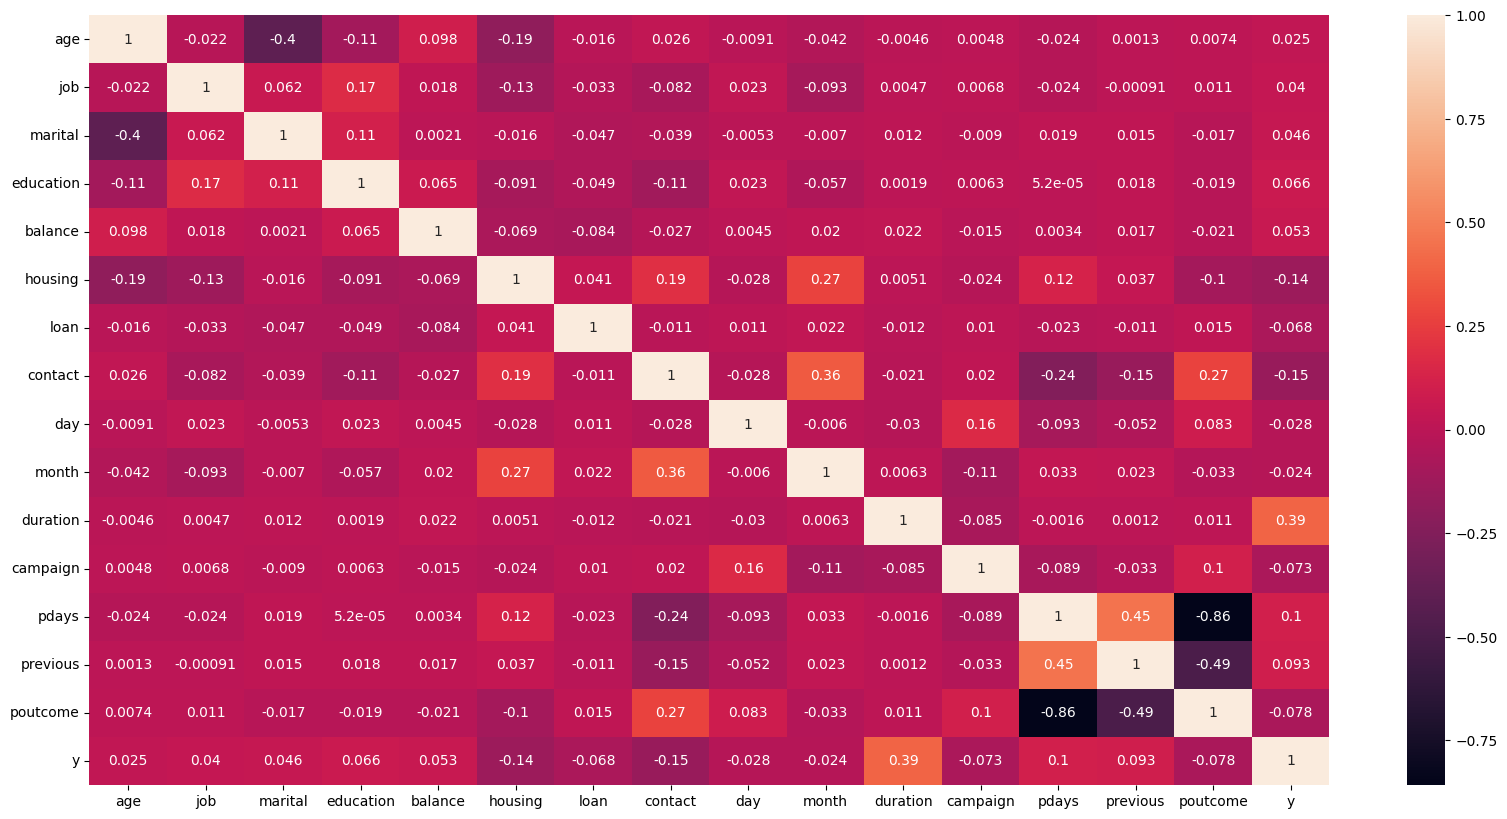

In [8]:
#create a heatmap to show the correlation between the columns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Feature Engineering

In [9]:
# we can combine the columns 'pdays' and 'previous' to create a new column 'pdays_previous'
df['pdays_previous'] = df['pdays'] + df['previous']
df.drop(['pdays', 'previous'], axis=1, inplace=True)

# we can combine the columns 'balance' and 'duration' to create a new column 'balance_duration'
df['balance_duration'] = df['balance'] + df['duration']
df.drop(['balance', 'duration'], axis=1, inplace=True)

# we can combine education and job to create a new column 'education_job'
df['education_job'] = df['education'] + df['job']
df.drop(['education', 'job'], axis=1, inplace=True)

# we can combine marital and housing to create a new column 'marital_housing'
df['marital_housing'] = df['marital'] + df['housing']
df.drop(['marital', 'housing'], axis=1, inplace=True)

# we can combine loan and contact to create a new column 'loan_contact'
df['loan_contact'] = df['loan'] + df['contact']
df.drop(['loan', 'contact'], axis=1, inplace=True)

# we can combine month and poutcome to create a new column 'month_poutcome'
df['month_poutcome'] = df['month'] + df['poutcome']
df.drop(['month', 'poutcome'], axis=1, inplace=True)

df.head()

,age,day,campaign,y,pdays_previous,balance_duration,education_job,marital_housing,loan_contact,month_poutcome
0,58,5,1,0,-1,2404,6,2,2,11
1,44,5,1,0,-1,180,10,3,2,11
2,33,5,1,0,-1,78,3,2,3,11
3,47,5,1,0,-1,1598,4,2,2,11
4,33,5,1,0,-1,199,14,2,2,11


In [12]:
# create the feature and target variables
X = df.drop(['y'], axis=1)
y = df['y']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model with dropout and batch normalization
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(len(X.columns),)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                320       
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
905/905 [==============================] - 8s 6ms/step - loss: 0.4002 - accuracy: 0.8511 - val_loss: 0.3369 - val_accuracy: 0.8825
Epoch 2/100
905/905 [==============================] - 5s 5ms/step - loss: 0.3432 - accuracy: 0.8818 - val_loss: 0.3305 - val_accuracy: 0.8824
Epoch 3/100
905/905 [==============================] - 5s 6ms/step - loss: 0.3353 - accuracy: 0.8836 - val_loss: 0.3323 - val_accuracy: 0.8825
Epoch 4/100
905/905 [==============================] - 5s 6ms/step - loss: 0.3310 - accuracy: 0.8838 - val_loss: 0.3455 - val_accuracy: 0.8825


283/283 [==============================] - 1s 3ms/step - loss: 0.3532 - accuracy: 0.8794


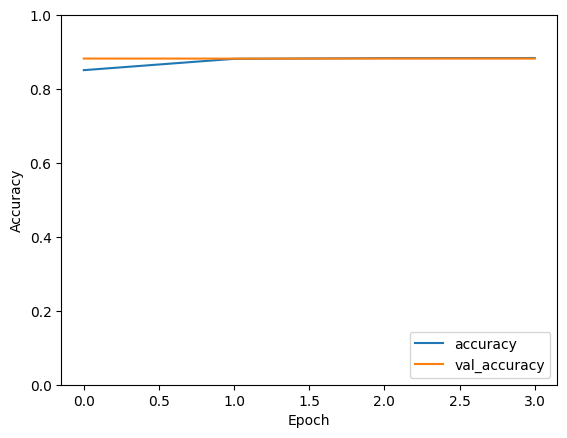

In [14]:
# evaluate the model
model.evaluate(X_test, y_test)

# plot the learning curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [20]:
# make predictions
predictions = model.predict(X_test)
predictions = np.round(predictions).flatten()
# accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy*100:.2f}%')


283/283 [==============================] - 1s 1ms/step
Accuracy: 87.94%
